In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots

In [2]:
# The dataset is obtained from Kaggle https://www.kaggle.com/danielgrijalvas/movies
data = pd.read_csv("G:\My Drive\Data Analyst projects\movies.csv")
copy = data.copy()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
# examine the number of null values in each col
for col in data.columns:
    num = sum(data[col].isnull())
    print(col +  ":" + str(num))

name:0
rating:77
genre:0
year:0
released:2
score:3
votes:3
director:0
writer:3
star:1
country:3
budget:2171
gross:189
company:17
runtime:4


In [5]:
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# examine the float64 
data[["score","votes","budget","gross","runtime"]]

,score,votes,budget,gross,runtime
0,8.4,927000.0,19000000.0,46998772.0,146.0
1,5.8,65000.0,4500000.0,58853106.0,104.0
2,8.7,1200000.0,18000000.0,538375067.0,124.0
3,7.7,221000.0,3500000.0,83453539.0,88.0
4,7.3,108000.0,6000000.0,39846344.0,98.0
...,...,...,...,...,...
7663,3.1,18.0,7000.0,NaN,90.0
7664,4.7,36.0,NaN,NaN,90.0
7665,5.7,29.0,58750.0,NaN,NaN
7666,NaN,NaN,15000.0,NaN,120.0


In [7]:
#votes, budget, gross, and runtime column has unncessary trailing .0s. So they will be cleaned
data[['votes','budget','gross','runtime']] = data[['votes','budget','gross','runtime']].fillna(0)
data[['votes','budget','gross','runtime']] = data[['votes','budget','gross','runtime']].astype('int64')
data[["score","votes","budget","gross","runtime"]]

,score,votes,budget,gross,runtime
0,8.4,927000,19000000,46998772,146
1,5.8,65000,4500000,58853106,104
2,8.7,1200000,18000000,538375067,124
3,7.7,221000,3500000,83453539,88
4,7.3,108000,6000000,39846344,98
...,...,...,...,...,...
7663,3.1,18,7000,0,90
7664,4.7,36,0,0,90
7665,5.7,29,58750,0,0
7666,NaN,0,15000,0,120


In [8]:
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120


In [9]:
#According to Kaggle, the year from the column 'release' and the year in the year column should be the same but they are not
# So, I'm going to fix it
data['year'] =data['released'].str.split(',').str[1].str[:5] # extract the year from the string
data['year'] = data['year'].fillna(0)             # fill all the Float NaN with 0
data['year'] = data['year'].astype('int')          # convert the year column from object -> int64

In [10]:
#drop duplicate
data.drop_duplicates(inplace = True)

Find correlation between budget and gross revenue

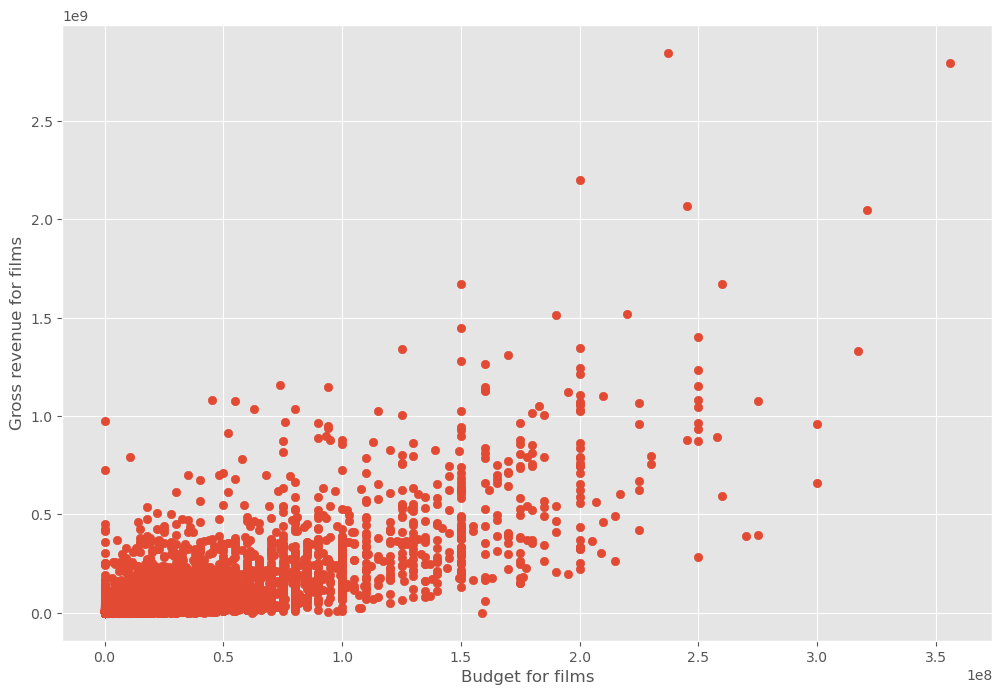

In [11]:
# Create scatter plot using matplotlib.pyplot and seaborn(with regression line)
plt.scatter(x = data['budget'], y = data['gross'])
plt.xlabel("Budget for films")
plt.ylabel("Gross revenue for films")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

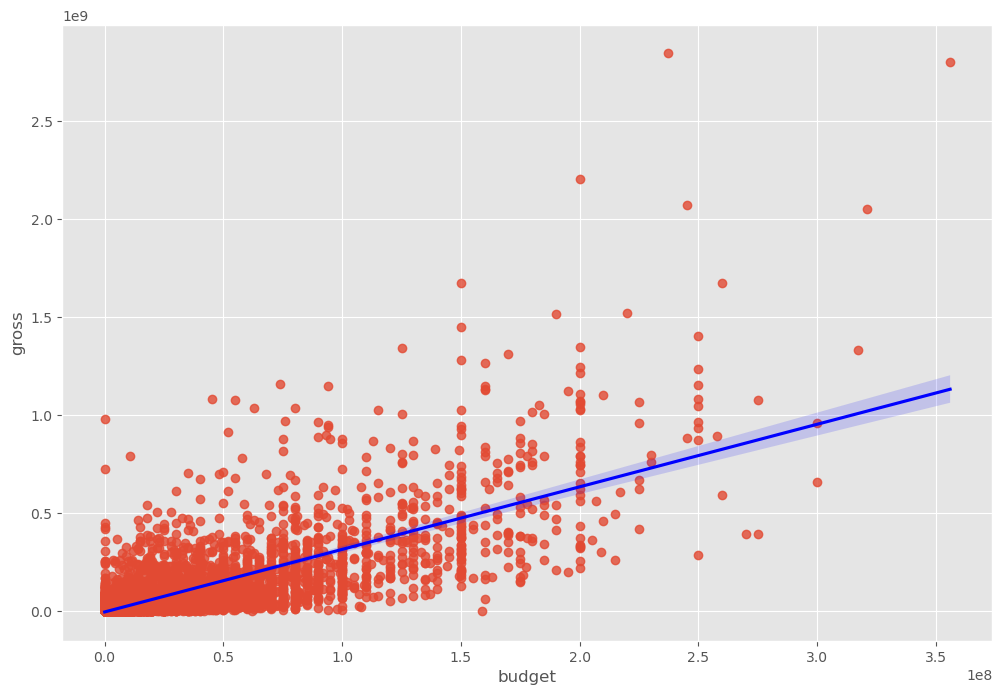

In [12]:
sns.regplot(x = data['budget'], y = data['gross'], line_kws = {'color':'blue'})

Text(120.72222222222221, 0.5, 'Movie features')

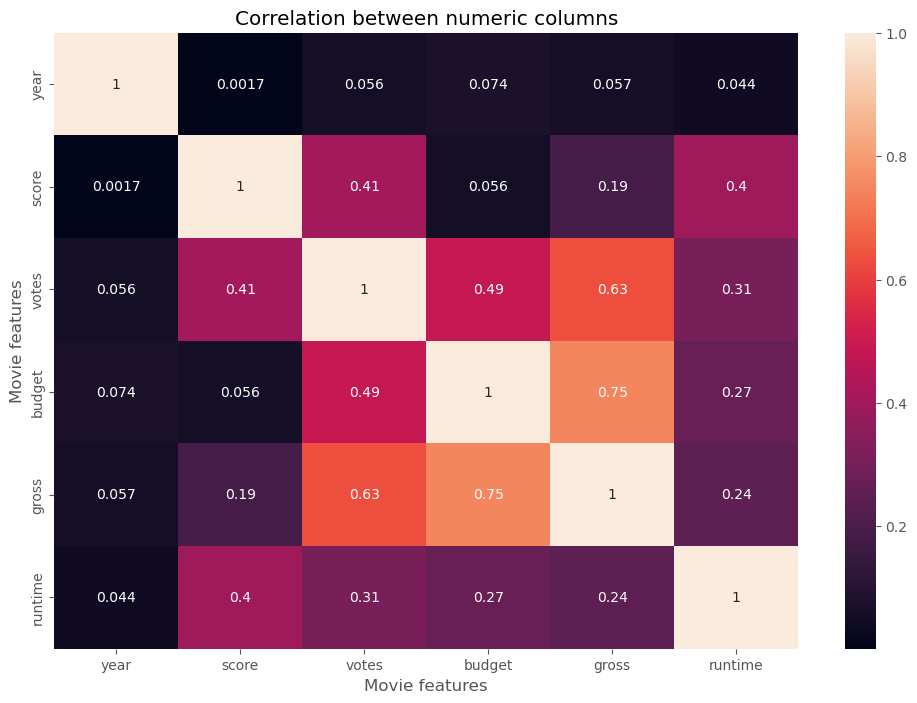

In [14]:
# Examine further correlation between numeric columns
correlation_df = data.corr()
sns.heatmap(correlation_df, annot = True)
plt.title("Correlation between numeric columns")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

In [15]:
# The above heat map only show correlation between numerical columns
# I'm going to show correlation between numerical and text columns by converting text columns into category type
                # and each value is represented by its categorical code
    
categorized_data = data

for col in categorized_data.columns:
    if categorized_data[col].dtypes == object:
        categorized_data[col] = categorized_data[col].astype('category')
        categorized_data[col] = categorized_data[col].cat.codes


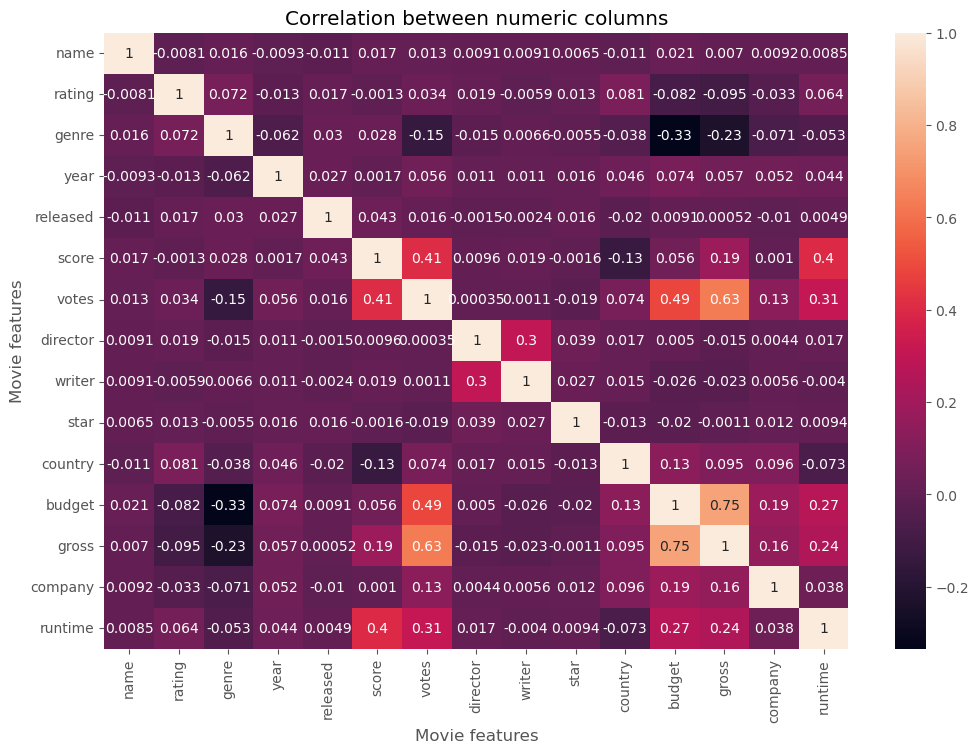

In [17]:
correlation_categorized_data = categorized_data.corr()
sns.heatmap(correlation_categorized_data, annot = True)
plt.title("Correlation between numeric columns")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [30]:
# Showing the correlaation between movie features(considering text columns)
correlation_categorized_data.unstack()[(correlation_categorized_data.unstack() > 0.5) & (correlation_categorized_data.unstack() <1) ]

votes   gross     0.632870
budget  gross     0.750157
gross   votes     0.632870
        budget    0.750157
dtype: float64

There are two strong correlation between votes, budget and gross revenue of a movie.